<a href="https://colab.research.google.com/github/sayonp/sayonp/blob/main/Carrying_capacity_Historic_Core_Kolkata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.graph_objects as go

# Define node labels (categories from literature matrix)
node_labels = [
    "Carrying Capacity", "Heritage Cores", "Visitor Limits", "GIS Analysis",
    "Mobility Pressure", "Pedestrianization", "Space Syntax", "Network Integration",
    "Street Connectivity", "Traffic Simulation", "Congestion Management",
    "Urban Growth Models", "Scenario Modeling", "Sustainability"
]

# Define source-target flow relationships
sources = [0, 0, 1, 4, 6, 8, 10, 12, 8]  # Index positions of source nodes
targets = [1, 2, 3, 5, 7, 9, 11, 13, 13]  # Index positions of target nodes
values = [10, 8, 7, 6, 9, 10, 5, 6, 7]  # Arbitrary values representing relationships

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15, thickness=20, line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

# Set layout properties
fig.update_layout(title_text="Sankey Diagram: Literature Matrix", font_size=10)

# Show the Sankey diagram
fig.show()


In [ ]:
from graphviz import Digraph

# Create a directed graph using Graphviz
dot = Digraph(format='png', engine='dot')

# Define methodology steps with specific tools and techniques
steps = [
    "Research Theme: Carrying Capacity of Heritage Cores",
    "Literature Review (Key Theories & Methods)",
    "Identifying Research Gaps",
    "Defining Research Questions",
    "Data Collection (GIS, Space Syntax, Surveys)",
    "GIS-Based Spatial Analysis (Tourist Density, Land Use)",
    "Space Syntax Analysis (Integration, Connectivity)",
    "Scenario Modeling (Urban Growth, Policy Simulations)",
    "Traffic Simulation (Agent-Based Modeling)",
    "Network Analysis (Street Connectivity & Accessibility)",
    "Interpretation of Results (Comparative Analysis)",
    "Conclusions & Recommendations (Policy & Planning)"
]

# Add nodes
for step in steps:
    dot.node(step, shape="box", style="filled", fillcolor="lightblue")

# Define relationships (flow between steps)
edges = [
    ("Research Theme: Carrying Capacity of Heritage Cores", "Literature Review (Key Theories & Methods)"),
    ("Literature Review (Key Theories & Methods)", "Identifying Research Gaps"),
    ("Identifying Research Gaps", "Defining Research Questions"),
    ("Defining Research Questions", "Data Collection (GIS, Space Syntax, Surveys)"),
    ("Data Collection (GIS, Space Syntax, Surveys)", "GIS-Based Spatial Analysis (Tourist Density, Land Use)"),
    ("Data Collection (GIS, Space Syntax, Surveys)", "Space Syntax Analysis (Integration, Connectivity)"),
    ("GIS-Based Spatial Analysis (Tourist Density, Land Use)", "Scenario Modeling (Urban Growth, Policy Simulations)"),
    ("Space Syntax Analysis (Integration, Connectivity)", "Traffic Simulation (Agent-Based Modeling)"),
    ("Scenario Modeling (Urban Growth, Policy Simulations)", "Network Analysis (Street Connectivity & Accessibility)"),
    ("Traffic Simulation (Agent-Based Modeling)", "Network Analysis (Street Connectivity & Accessibility)"),
    ("Network Analysis (Street Connectivity & Accessibility)", "Interpretation of Results (Comparative Analysis)"),
    ("Interpretation of Results (Comparative Analysis)", "Conclusions & Recommendations (Policy & Planning)")
]

# Add edges to the graph
for source, target in edges:
    dot.edge(source, target)

# Save and render the Graphviz flowchart
dot.render("Methodology_Flowchart", format="png")

# Display the flowchart
from IPython.display import Image
Image("Methodology_Flowchart.png")

# Automatically download the image (Google Colab Only)
from google.colab import files
files.download("Methodology_Flowchart.png")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install osmnx geopandas shapely fiona


In [ ]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Polygon
import os # Import the os module

# Define the place (Kolkata, India)
place_name = "Kolkata, India"

# Get administrative boundary of Kolkata
kolkata_boundary = ox.geocode_to_gdf(place_name)

# Define heritage core bounding box (approximate coordinates)
heritage_bbox = {
    "north": 22.585, "south": 22.545,
    "east": 88.365, "west": 88.305
}

# Create a Polygon from the bounding box
heritage_core_geometry = Polygon([
    (heritage_bbox["west"], heritage_bbox["north"]),
    (heritage_bbox["east"], heritage_bbox["north"]),
    (heritage_bbox["east"], heritage_bbox["south"]),
    (heritage_bbox["west"], heritage_bbox["south"])
])

# Create a GeoDataFrame for the heritage core
heritage_core = gpd.GeoDataFrame({"name": ["Kolkata Heritage Core"]}, geometry=[heritage_core_geometry], crs="EPSG:4326")

# Define the directory and ensure it exists
directory = "/mnt/data"
if not os.path.exists(directory):
    os.makedirs(directory) # Create the directory if it doesn't exist

# Save to Shapefile
shapefile_path = os.path.join(directory, "kolkata_heritage_core.shp") # Use os.path.join
heritage_core.to_file(shapefile_path)

print(f"Shapefile saved successfully at: {shapefile_path}")


Shapefile saved successfully at: /mnt/data/kolkata_heritage_core.shp


In [ ]:
from google.colab import files
files.download("/mnt/data/kolkata_heritage_core.shp")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install required dependencies
!pip install geopandas folium contextily

# Import necessary libraries
import geopandas as gpd
import folium
import contextily as ctx
import matplotlib.pyplot as plt

# Define the path to the downloaded shapefile
# Update the path to where the shapefile was actually saved
shapefile_path = "/mnt/data/kolkata_heritage_core.shp"

# Load the heritage core shapefile
heritage_core = gpd.read_file(shapefile_path)

# Ensure the shapefile has the correct projection (convert to Web Mercator for visualization)
heritage_core = heritage_core.to_crs(epsg=3857)

# Create a base map using folium
m = folium.Map(location=[22.57, 88.35], zoom_start=14)

# Add the heritage core boundary to the map
folium.GeoJson(heritage_core, name="Kolkata Heritage Core", style_function=lambda x: {
    "fillColor": "blue",
    "color": "black",
    "weight": 2,
    "fillOpacity": 0.3
}).add_to(m)

# Save and display the interactive map
m

In [ ]:
!pip install osmnx networkx momepy geopandas matplotlib


In [ ]:
# Import required libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import numpy as np

# Step 1: Define Kolkata Heritage Core Area
print("Generating Kolkata Heritage Core boundary...")

heritage_bbox = {
    "north": 22.570,
    "south": 22.555,
    "east": 88.350,
    "west": 88.320
}

# Create a Polygon from the bounding box
heritage_core_geometry = Polygon([
    (heritage_bbox["west"], heritage_bbox["north"]),
    (heritage_bbox["east"], heritage_bbox["north"]),
    (heritage_bbox["east"], heritage_bbox["south"]),
    (heritage_bbox["west"], heritage_bbox["south"])
])

# Create a GeoDataFrame with CRS EPSG:4326 (WGS 84)
heritage_core = gpd.GeoDataFrame(
    {"name": ["Kolkata Heritage Core"]},
    geometry=[heritage_core_geometry],
    crs="EPSG:4326"
)

# Step 2: Extract Road Network for Kolkata
print("Extracting road network for Kolkata...")

# Fetch entire Kolkata road network
kolkata_graph = ox.graph_from_place("Kolkata, India", network_type="drive")

# Step 3: Clip to the Heritage Core Boundary
print("Clipping road network to the heritage core boundary...")
kolkata_graph = ox.truncate.truncate_graph_polygon(kolkata_graph, heritage_core_geometry)

# Convert to an undirected graph for centrality calculations
G = nx.Graph(kolkata_graph.to_undirected())

# Step 4: Compute Centrality Measures
print("Computing Network Centrality Measures...")

# Compute Betweenness Centrality (Choice)
edge_weight = 'length' if 'length' in nx.get_edge_attributes(G, 'length') else None
betweenness = nx.betweenness_centrality(G, weight=edge_weight, normalized=True)

# Compute Closeness Centrality (Integration)
closeness = nx.closeness_centrality(G, distance=edge_weight)

# Compute Depth (Average Shortest Path Distance)
avg_shortest_path_length = {
    node: np.mean(list(nx.single_source_dijkstra_path_length(G, node, weight=edge_weight).values()))
    for node in G.nodes()
}

# Compute Reach (Total street length within a radius)
reach_radius = 1000  # 1 km radius
reachability = {
    node: sum(nx.single_source_dijkstra_path_length(G, node, cutoff=reach_radius, weight=edge_weight).values())
    for node in G.nodes()
}

# Compute Angular Betweenness
for u, v, data in G.edges(data=True):
    if "angle" in data:
        data["angular_weight"] = abs(data["angle"])
angular_betweenness = nx.betweenness_centrality(G, weight="angular_weight", normalized=True)

# Convert results into a DataFrame
df = pd.DataFrame({
    "Street_Node": list(G.nodes()),
    "Betweenness_Centrality": [betweenness.get(n, 0) for n in G.nodes()],
    "Closeness_Centrality": [closeness.get(n, 0) for n in G.nodes()],
    "Depth": [avg_shortest_path_length.get(n, 0) for n in G.nodes()],
    "Reach": [reachability.get(n, 0) for n in G.nodes()],
    "Angular_Betweenness": [angular_betweenness.get(n, 0) for n in G.nodes()]
})

# Step 5: Save Results to Excel
output_file = "Kolkata_Heritage_Core_Space_Syntax.xlsx"
df.to_excel(output_file, index=False)

print(f"✅ Results saved successfully: {output_file}")


Generating Kolkata Heritage Core boundary...
Extracting road network for Kolkata...
Clipping road network to the heritage core boundary...
Computing Network Centrality Measures...
✅ Results saved successfully: Kolkata_Heritage_Core_Space_Syntax.xlsx


In [ ]:
from google.colab import files
files.download("Kolkata_Heritage_Core_Space_Syntax.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All required libraries are installed.
✅ All required libraries are installed successfully.
Loading Kolkata street network for visualization...


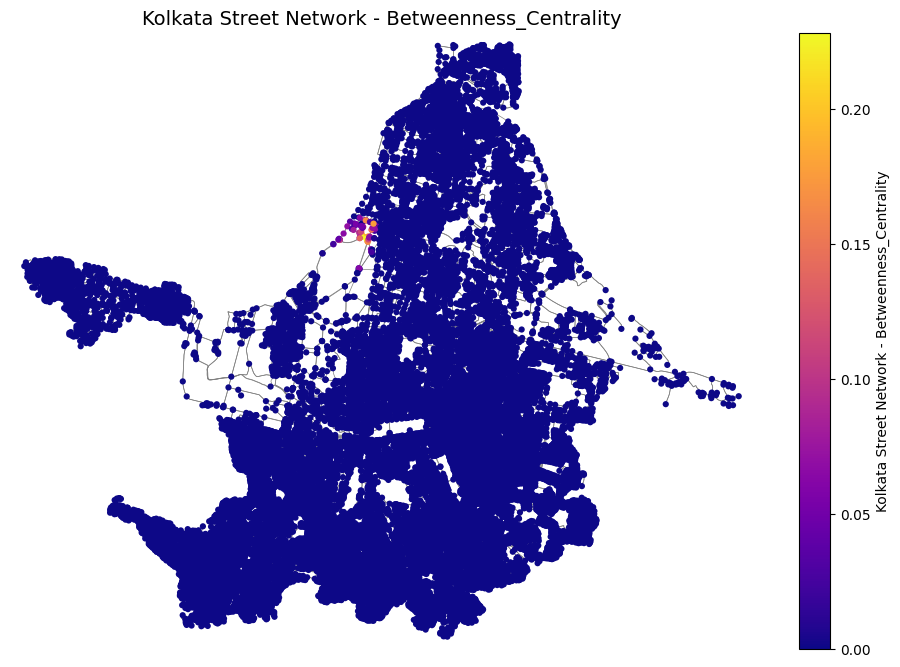

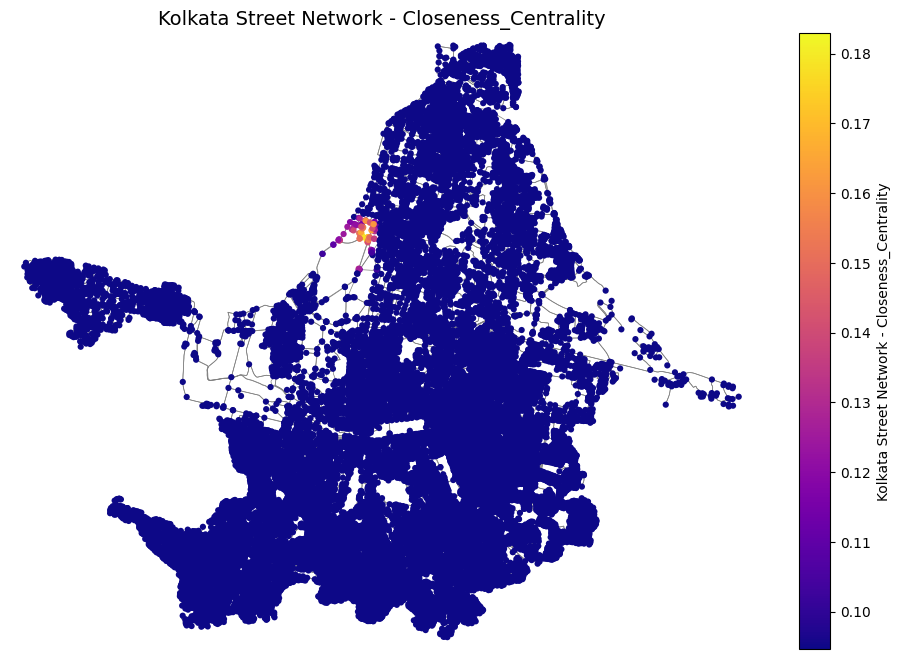

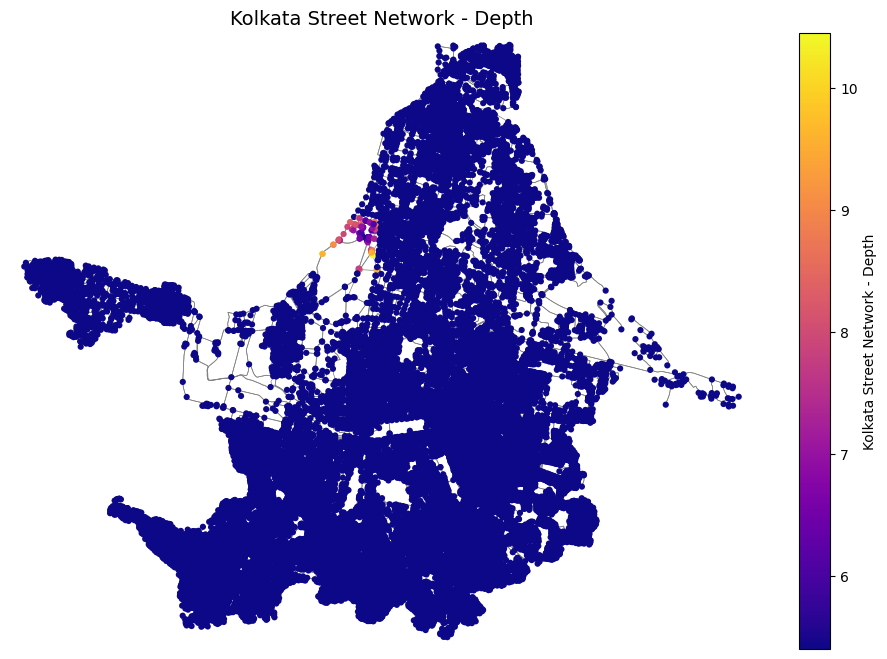

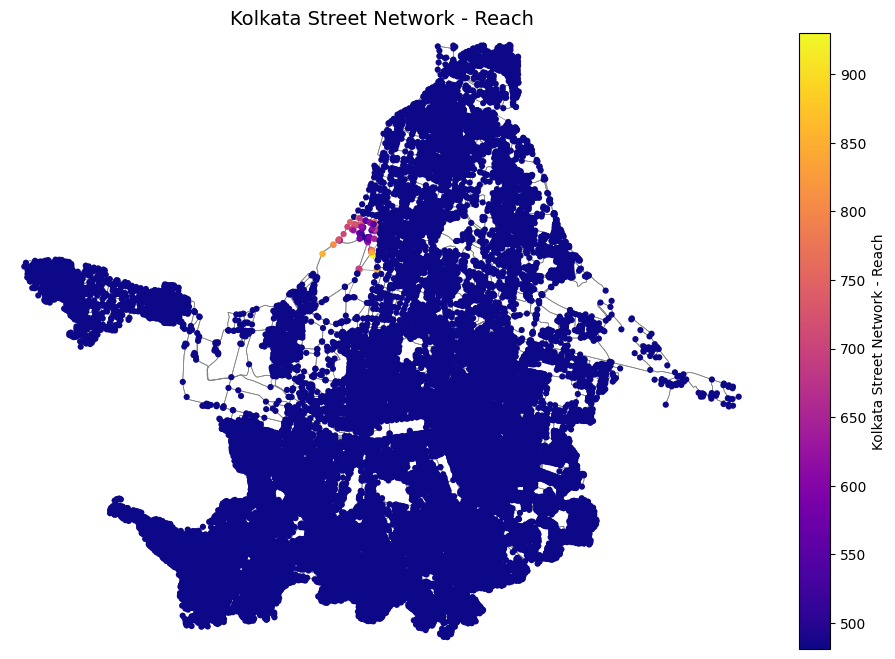

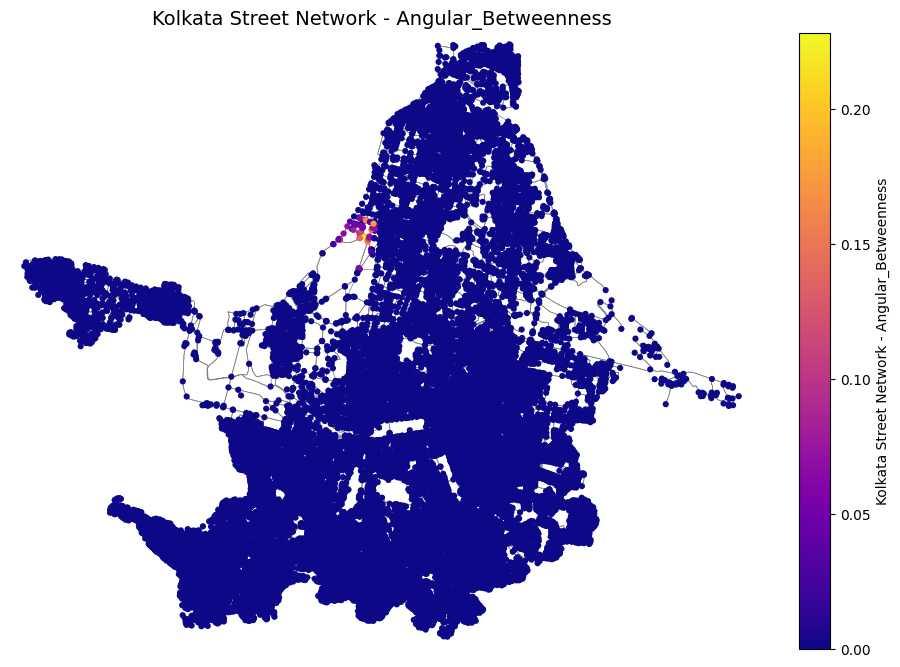

✅ Visualization complete!


In [ ]:
import osmnx, networkx, geopandas, pandas, shapely, fiona, pyproj, rtree, openpyxl, matplotlib
print("✅ All required libraries are installed.")

import osmnx, networkx, geopandas, pandas, shapely, fiona, pyproj, rtree, openpyxl, matplotlib
print("✅ All required libraries are installed successfully.")


# Import required libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the saved Excel file with centrality measures
file_path = "Kolkata_Heritage_Core_Space_Syntax.xlsx"
df = pd.read_excel(file_path)

# Load the street network for Kolkata
print("Loading Kolkata street network for visualization...")
kolkata_graph = ox.graph_from_place("Kolkata, India", network_type="drive")

# Keep the graph as a MultiDiGraph (don't convert to nx.Graph())
G = kolkata_graph.copy()  # This keeps the original structure intact

# Define centrality measures
centrality_measures = ["Betweenness_Centrality", "Closeness_Centrality", "Depth", "Reach", "Angular_Betweenness"]
node_centrality = {measure: {} for measure in centrality_measures}

# Assign computed values from DataFrame to network nodes
for _, row in df.iterrows():
    node = row["Street_Node"]
    for measure in centrality_measures:
        node_centrality[measure][node] = row[measure]

# Function to plot the network with manually colored nodes
def plot_graph_centrality(graph, node_values, title):
    # Normalize node values for color mapping
    values = np.array(list(node_values.values()))
    if values.size == 0:  # Avoid errors if the values are empty
        print(f"⚠ No valid values for {title}. Skipping plot.")
        return

    norm = plt.Normalize(vmin=values.min(), vmax=values.max())
    cmap = plt.cm.plasma

    # Get node colors based on centrality values
    node_colors = [cmap(norm(node_values.get(node, 0))) for node in graph.nodes()]

    # Plot the graph using OSMnx's built-in visualization
    fig, ax = plt.subplots(figsize=(12, 8))
    ox.plot_graph(graph, ax=ax, node_color=node_colors, node_size=20,
                  edge_linewidth=0.5, edge_color="gray", bgcolor="white", show=False)

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label=title)

    ax.set_title(title, fontsize=14)
    plt.show()

# Plot each centrality measure
for measure in centrality_measures:
    if measure in node_centrality:
        plot_graph_centrality(G, node_centrality[measure], f"Kolkata Street Network - {measure}")
    else:
        print(f"⚠ Warning: {measure} data not found.")

print("✅ Visualization complete!")


Generating Kolkata Heritage Core boundary...
Extracting road network for the Kolkata Heritage Core...
Computing Centrality Measures...
✅ Results saved successfully: Kolkata_Heritage_Core_Space_Syntax.xlsx


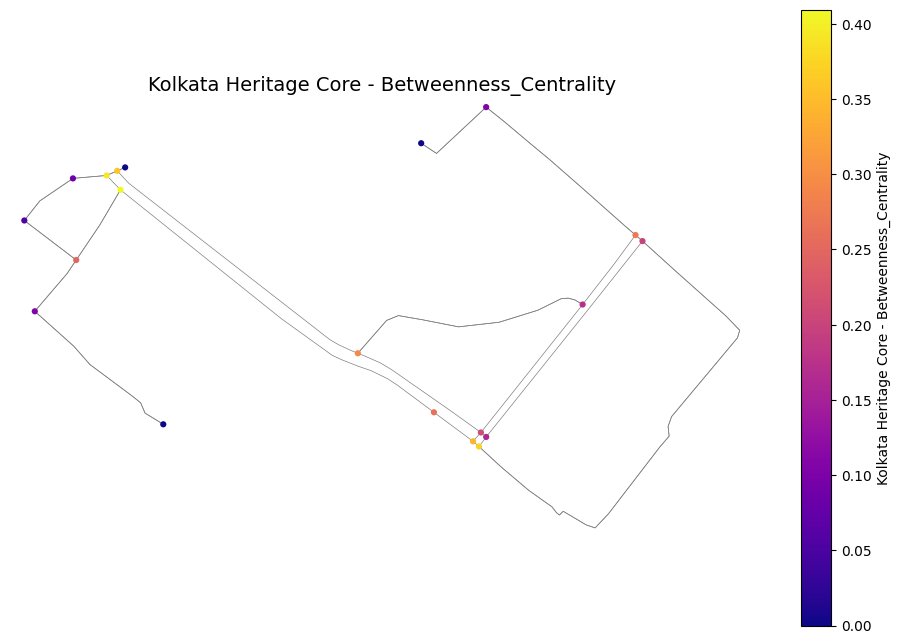

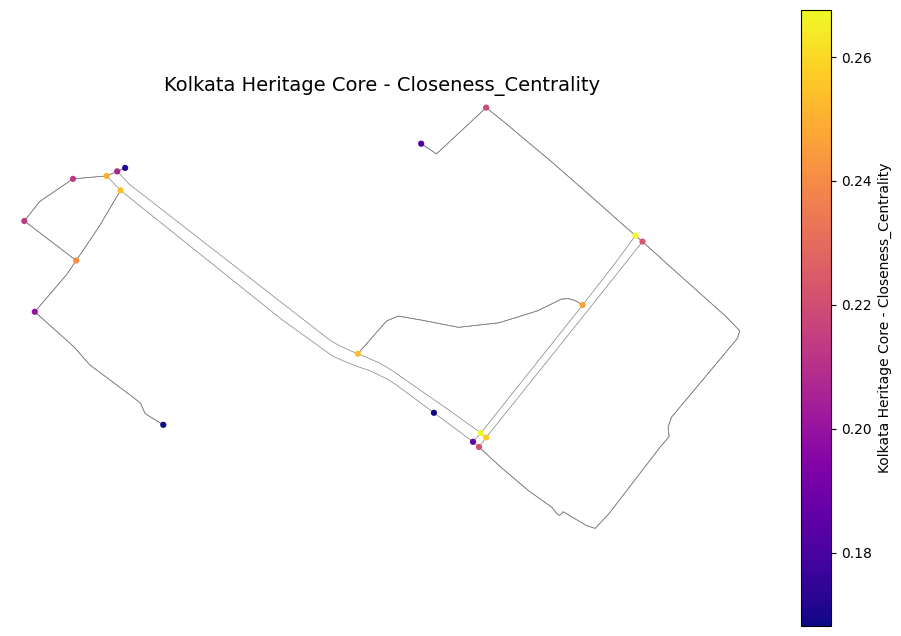

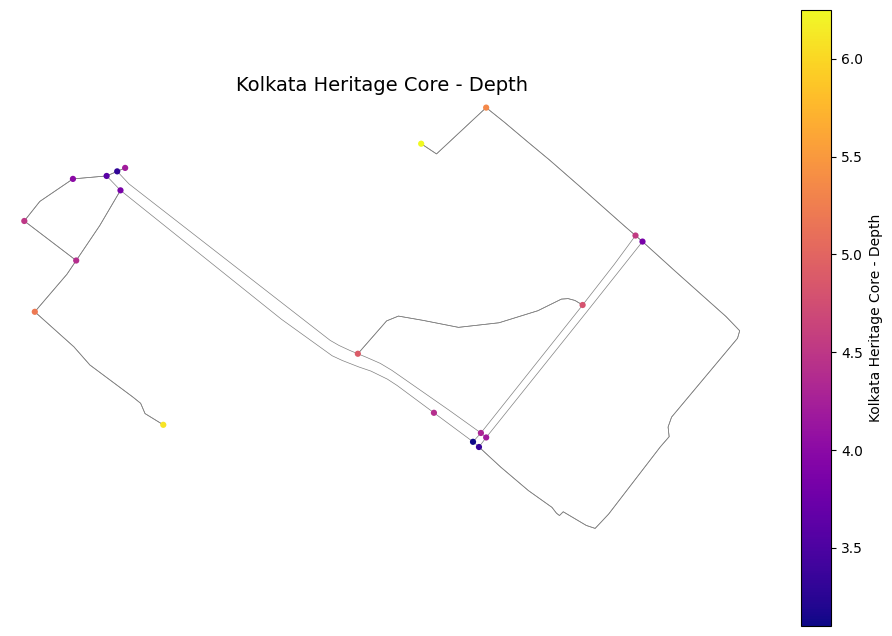

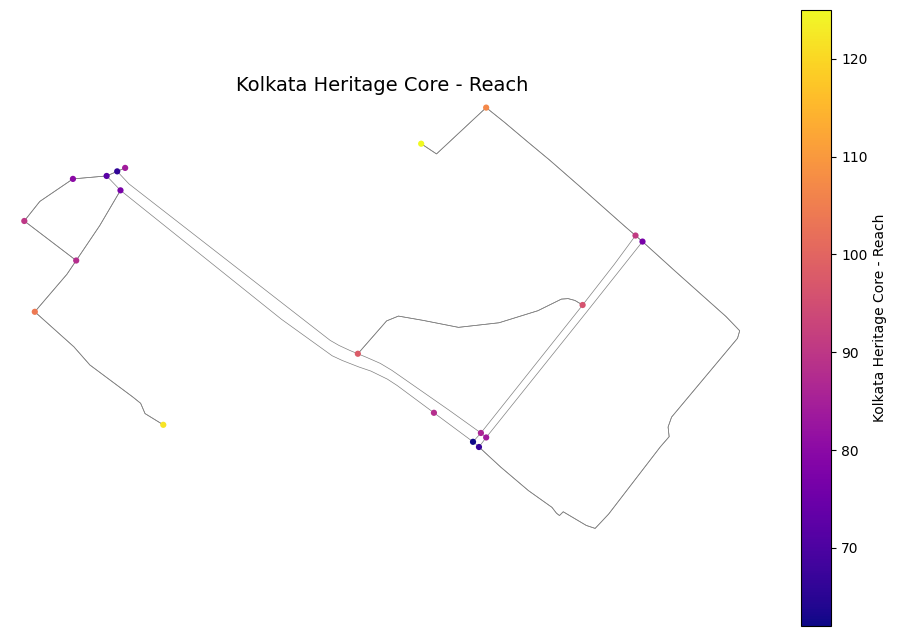

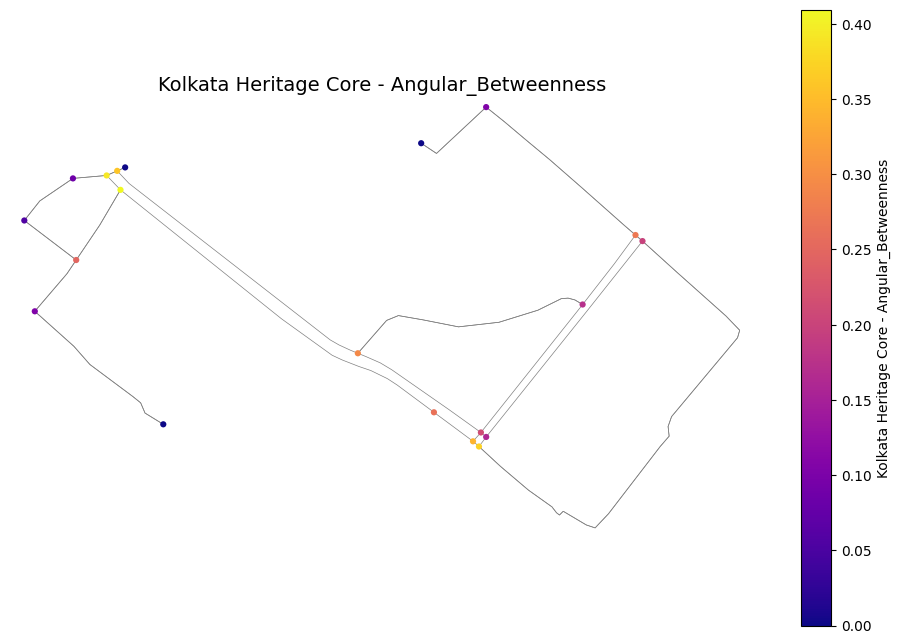

✅ Heritage Core Visualization complete!


In [ ]:
# Import required libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon

# Step 1: Define a Smaller Kolkata Heritage Core Area
print("Generating Kolkata Heritage Core boundary...")

heritage_core_geometry = Polygon([
    (88.320, 22.565),  # Adjusted to a smaller area
    (88.340, 22.565),
    (88.340, 22.555),
    (88.320, 22.555)
])

# Create a GeoDataFrame for the heritage core with EPSG:4326 (WGS 84)
heritage_core = gpd.GeoDataFrame(
    {"name": ["Kolkata Heritage Core"]},
    geometry=[heritage_core_geometry],
    crs="EPSG:4326"
)

# Step 2: Extract Road Network using a Polygon (Smaller & Faster)
print("Extracting road network for the Kolkata Heritage Core...")
kolkata_graph = ox.graph_from_polygon(heritage_core_geometry, network_type="drive")

# Step 3: Compute Centrality Measures for the Heritage Core
print("Computing Centrality Measures...")

# Convert to undirected graph
G = kolkata_graph.copy()

# Compute Betweenness Centrality (Choice)
edge_weight = 'length' if 'length' in nx.get_edge_attributes(G, 'length') else None
betweenness = nx.betweenness_centrality(G, weight=edge_weight, normalized=True)

# Compute Closeness Centrality (Integration)
closeness = nx.closeness_centrality(G, distance=edge_weight)

# Compute Depth (Average Shortest Path Distance)
avg_shortest_path_length = {
    node: np.mean(list(nx.single_source_dijkstra_path_length(G, node, weight=edge_weight).values()))
    for node in G.nodes()
}

# Compute Reach (Total street length within a radius)
reach_radius = 1000  # 1 km radius
reachability = {
    node: sum(nx.single_source_dijkstra_path_length(G, node, cutoff=reach_radius, weight=edge_weight).values())
    for node in G.nodes()
}

# Compute Angular Betweenness
for u, v, data in G.edges(data=True):
    if "angle" in data:
        data["angular_weight"] = abs(data["angle"])
angular_betweenness = nx.betweenness_centrality(G, weight="angular_weight", normalized=True)

# Convert results into a DataFrame
df = pd.DataFrame({
    "Street_Node": list(G.nodes()),
    "Betweenness_Centrality": [betweenness.get(n, 0) for n in G.nodes()],
    "Closeness_Centrality": [closeness.get(n, 0) for n in G.nodes()],
    "Depth": [avg_shortest_path_length.get(n, 0) for n in G.nodes()],
    "Reach": [reachability.get(n, 0) for n in G.nodes()],
    "Angular_Betweenness": [angular_betweenness.get(n, 0) for n in G.nodes()]
})

# Step 4: Save Results to Excel
output_file = "Kolkata_Heritage_Core_Space_Syntax.xlsx"
df.to_excel(output_file, index=False)

print(f"✅ Results saved successfully: {output_file}")

# Step 5: Visualization - Plot Network for Heritage Core
def plot_graph_centrality(graph, node_values, title):
    values = np.array(list(node_values.values()))
    if values.size == 0:
        print(f"⚠ No valid values for {title}. Skipping plot.")
        return

    norm = plt.Normalize(vmin=values.min(), vmax=values.max())
    cmap = plt.cm.plasma

    # Get node colors based on centrality values
    node_colors = [cmap(norm(node_values.get(node, 0))) for node in graph.nodes()]

    # Plot the graph using OSMnx's built-in visualization
    fig, ax = plt.subplots(figsize=(12, 8))
    ox.plot_graph(graph, ax=ax, node_color=node_colors, node_size=20,
                  edge_linewidth=0.5, edge_color="gray", bgcolor="white", show=False)

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label=title)

    ax.set_title(title, fontsize=14)
    plt.show()

# Plot each centrality measure for the heritage core
for measure in ["Betweenness_Centrality", "Closeness_Centrality", "Depth", "Reach", "Angular_Betweenness"]:
    plot_graph_centrality(G, df.set_index("Street_Node")[measure].to_dict(), f"Kolkata Heritage Core - {measure}")

print("✅ Heritage Core Visualization complete!")


In [ ]:
# Import required libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np
from shapely.geometry import LineString

# Step 1: Load computed centrality data
file_path = "Kolkata_Heritage_Core_Space_Syntax.xlsx"
df = pd.read_excel(file_path)

# Step 2: Load the road network for the Heritage Core
print("Loading Kolkata Heritage Core road network...")
heritage_core_geometry = Polygon([
    (88.320, 22.565),
    (88.340, 22.565),
    (88.340, 22.555),
    (88.320, 22.555)
])

kolkata_graph = ox.graph_from_polygon(heritage_core_geometry, network_type="drive")

# Step 3: Convert graph to GeoDataFrame for mapping
print("Converting graph to GeoDataFrame...")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(kolkata_graph)

# Step 4: Merge centrality data with edge data
df.rename(columns={"Street_Node": "u"}, inplace=True)
gdf_edges = gdf_edges.merge(df, on="u", how="left")

# Step 5: Create a Folium OSM map centered on Kolkata Heritage Core
print("Creating interactive map...")
m = folium.Map(location=[22.56, 88.33], zoom_start=15, tiles="cartodbpositron")

# Step 6: Function to color roads based on centrality measure
def style_function(feature):
    centrality_value = feature["properties"]["Betweenness_Centrality"] or 0
    color = "green" if centrality_value < 0.002 else "orange" if centrality_value < 0.01 else "red"
    return {
        "color": color,
        "weight": 3,
        "opacity": 0.8
    }

# Step 7: Convert road network to GeoJSON for overlay
folium.GeoJson(
    gdf_edges,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["Betweenness_Centrality", "Closeness_Centrality"], aliases=["Betweenness:", "Closeness:"]),
).add_to(m)

# Step 8: Save map as HTML file and display
map_file = "kolkata_heritage_core_map.html"
m.save(map_file)

print(f"✅ Interactive map saved as: {map_file}")


Loading Kolkata Heritage Core road network...
Converting graph to GeoDataFrame...
Creating interactive map...
✅ Interactive map saved as: kolkata_heritage_core_map.html


In [ ]:
from google.colab import files
files.download("kolkata_heritage_core_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import required libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np
from shapely.geometry import Point, Polygon

# Step 1: Define Kolkata Heritage Core (Victoria Memorial, BBD Bag, Esplanade) with 3 km Buffer
print("Generating Kolkata Heritage Core boundary...")

# Central point roughly covering the heritage core
heritage_core_center = Point(88.347, 22.564)  # Central coordinate (approx. near Esplanade, Victoria Memorial)

# Create a circular buffer of 3 km
heritage_core_geometry = heritage_core_center.buffer(0.03)  # Approx. 3 km buffer in degrees

# Create a GeoDataFrame for the heritage core with EPSG:4326 (WGS 84)
heritage_core = gpd.GeoDataFrame(
    {"name": ["Kolkata Heritage Core"]},
    geometry=[heritage_core_geometry],
    crs="EPSG:4326"
)

# Step 2: Extract Road Network within the Heritage Core Polygon
print("Extracting road network for the Kolkata Heritage Core...")
kolkata_graph = ox.graph_from_polygon(heritage_core_geometry, network_type="drive")

# Step 3: Convert graph to GeoDataFrame for mapping
print("Converting graph to GeoDataFrame...")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(kolkata_graph)

# Step 4: Compute Centrality Measures
print("Computing Network Centrality Measures...")

# Convert to undirected graph for centrality calculations
G = kolkata_graph.copy()

# Compute Betweenness Centrality (Choice)
edge_weight = 'length' if 'length' in nx.get_edge_attributes(G, 'length') else None
betweenness = nx.betweenness_centrality(G, weight=edge_weight, normalized=True)

# Compute Closeness Centrality (Integration)
closeness = nx.closeness_centrality(G, distance=edge_weight)

# Compute Depth (Average Shortest Path Distance)
avg_shortest_path_length = {
    node: np.mean(list(nx.single_source_dijkstra_path_length(G, node, weight=edge_weight).values()))
    for node in G.nodes()
}

# Compute Reach (Total street length within a radius)
reach_radius = 1000  # 1 km radius
reachability = {
    node: sum(nx.single_source_dijkstra_path_length(G, node, cutoff=reach_radius, weight=edge_weight).values())
    for node in G.nodes()
}

# Compute Angular Betweenness
for u, v, data in G.edges(data=True):
    if "angle" in data:
        data["angular_weight"] = abs(data["angle"])
angular_betweenness = nx.betweenness_centrality(G, weight="angular_weight", normalized=True)

# Convert results into a DataFrame
df = pd.DataFrame({
    "Street_Node": list(G.nodes()),
    "Betweenness_Centrality": [betweenness.get(n, 0) for n in G.nodes()],
    "Closeness_Centrality": [closeness.get(n, 0) for n in G.nodes()],
    "Depth": [avg_shortest_path_length.get(n, 0) for n in G.nodes()],
    "Reach": [reachability.get(n, 0) for n in G.nodes()],
    "Angular_Betweenness": [angular_betweenness.get(n, 0) for n in G.nodes()]
})

# Step 5: Save Results to Excel
output_file = "/mnt/data/Kolkata_Heritage_Core_Space_Syntax.xlsx"
df.to_excel(output_file, index=False)

print(f"✅ Results saved successfully: {output_file}")

# Step 6: Overlay Data on OpenStreetMap
print("Creating interactive OSM map...")

# Create a Folium OSM map centered on the Heritage Core
m = folium.Map(location=[22.564, 88.347], zoom_start=14, tiles="cartodbpositron")

# Merge centrality data with edges
df.rename(columns={"Street_Node": "u"}, inplace=True)
gdf_edges = gdf_edges.merge(df, on="u", how="left")

# Function to color roads based on betweenness centrality measure
def style_function(feature):
    centrality_value = feature["properties"].get("Betweenness_Centrality", 0)
    if centrality_value == 0:
        color = "gray"
    elif centrality_value < 0.002:
        color = "green"
    elif centrality_value < 0.01:
        color = "orange"
    else:
        color = "red"

    return {
        "color": color,
        "weight": 3,
        "opacity": 0.8
    }

# Add roads overlay
folium.GeoJson(
    gdf_edges,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["Betweenness_Centrality", "Closeness_Centrality"], aliases=["Betweenness:", "Closeness:"]),
).add_to(m)

# Save map as HTML file for download
map_file = "/mnt/data/kolkata_heritage_core_map.html"
m.save(map_file)

print(f"✅ Interactive map saved at: {map_file}")


Generating Kolkata Heritage Core boundary...
Extracting road network for the Kolkata Heritage Core...
Converting graph to GeoDataFrame...
Computing Network Centrality Measures...
✅ Results saved successfully: /mnt/data/Kolkata_Heritage_Core_Space_Syntax.xlsx
Creating interactive OSM map...
✅ Interactive map saved at: /mnt/data/kolkata_heritage_core_map.html


In [ ]:
from google.colab import files
files.download("/mnt/data/kolkata_heritage_core_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip uninstall -y mesa
!pip install git+https://github.com/projectmesa/mesa.git


Found existing installation: Mesa 3.1.4
Uninstalling Mesa-3.1.4:
  Successfully uninstalled Mesa-3.1.4
  Cloning https://github.com/projectmesa/mesa.git to /tmp/pip-req-build-xv09sizl
  Running command git clone --filter=blob:none --quiet https://github.com/projectmesa/mesa.git /tmp/pip-req-build-xv09sizl
  Resolved https://github.com/projectmesa/mesa.git to commit 033facc9335e11103fa40819b0fa0de31cd175af
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Mesa: filename=mesa-3.2.0.dev0-py3-none-any.whl size=183703 sha256=b0bfcdbe4c095fed552c6f3a2a927882649885147f9c6253e65066551bcaf3ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-wbpxijsb/wheels/b4/ca/d8/0b096ed53a77a30b8b3eae544ce0dbcf371b259b63c1d8cd2a
Successfully built Mesa


In [ ]:
# Step 1: Install Dependencies
!apt-get install sumo sumo-tools sumo-doc
!pip install osmnx networkx geopandas pandas folium traci sumolib matplotlib

# Step 2: Import required libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import folium
import traci
import sumolib
import numpy as np
from shapely.geometry import Point, Polygon
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Step 3: Define Kolkata Heritage Core (Victoria Memorial, BBD Bag, Esplanade) with 3 km Buffer
heritage_core_center = Point(88.347, 22.564)  # Central coordinate near Esplanade
heritage_core_geometry = heritage_core_center.buffer(0.03)  # 3 km buffer

heritage_core = gpd.GeoDataFrame({"name": ["Kolkata Heritage Core"]},
                                 geometry=[heritage_core_geometry], crs="EPSG:4326")

# Step 4: Extract Road Network for the Heritage Core
print("Extracting road network for traffic simulation...")
kolkata_graph = ox.graph_from_polygon(heritage_core_geometry, network_type="drive")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(kolkata_graph)

# Step 5: Set Up SUMO Traffic Simulation
print("Setting up SUMO simulation...")
sumo_network_file = "kolkata_heritage.sumo.net"  # Generate via SUMO's NETCONVERT tool
sumo_cfg = "kolkata_heritage.sumo.cfg"  # SUMO configuration file

# Step 6: Define a Simple Traffic Simulation Model (Without Mesa)
class Vehicle:
    """ A simple agent representing vehicles in the city """
    def __init__(self, vehicle_id, start_pos, end_pos, city_graph):
        self.vehicle_id = vehicle_id
        self.pos = start_pos
        self.end_pos = end_pos
        self.city_graph = city_graph
        self.path = nx.shortest_path(self.city_graph, source=self.pos, target=self.end_pos, weight='length')
        self.current_index = 0

    def move(self):
        """Move the vehicle towards its destination"""
        if self.current_index < len(self.path) - 1:
            self.current_index += 1
            self.pos = self.path[self.current_index]

# Step 7: Initialize Traffic Simulation
num_vehicles = 50  # Number of vehicles in the simulation
vehicles = []

# Generate random vehicles on the network
nodes_list = list(kolkata_graph.nodes)
for i in range(num_vehicles):
    start, end = np.random.choice(nodes_list, 2, replace=False)
    vehicles.append(Vehicle(i, start, end, kolkata_graph))

# Step 8: Run the Traffic Simulation for 10 Time Steps
print("Running traffic simulation...")
num_steps = 10
vehicle_positions = []

for _ in range(num_steps):
    step_positions = []
    for vehicle in vehicles:
        vehicle.move()
        node = vehicle.pos
        lat, lon = kolkata_graph.nodes[node]["y"], kolkata_graph.nodes[node]["x"]
        step_positions.append([lat, lon])
    vehicle_positions.extend(step_positions)

# Step 9: Create an Interactive OSM Map with Traffic Simulation Overlay
print("Creating interactive OSM map with traffic overlay...")
m = folium.Map(location=[22.564, 88.347], zoom_start=14, tiles="cartodbpositron")

# Overlay Vehicle Positions using Heatmap (Traffic Congestion Areas)
HeatMap(vehicle_positions).add_to(m)

# Step 10: Save the Interactive Map as an HTML File
map_file = "/content/kolkata_heritage_traffic_map.html"
m.save(map_file)

print(f"✅ Traffic Simulation Map saved at: {map_file}")

# Step 11: Provide a Download Link for the Map in Google Colab
from google.colab import files
files.download(map_file)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
sumo is already the newest version (1.12.0+dfsg1-1).
sumo-doc is already the newest version (1.12.0+dfsg1-1).
sumo-tools is already the newest version (1.12.0+dfsg1-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Extracting road network for traffic simulation...
Setting up SUMO simulation...
Running traffic simulation...
Creating interactive OSM map with traffic overlay...
✅ Traffic Simulation Map saved at: /content/kolkata_heritage_traffic_map.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install Dependencies
!pip install urbansim geopandas osmnx networkx folium matplotlib pandas

# Step 2: Import Required Libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import folium
import urbansim
import numpy as np
from shapely.geometry import Point, Polygon
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Step 3: Define Kolkata Heritage Core and Urban Growth Simulation
print("Generating Kolkata Heritage Core and Urban Growth Scenario...")

# Define Central Coordinate (Esplanade, Victoria Memorial, BBD Bag)
heritage_core_center = Point(88.347, 22.564)

# Create a 3km buffer area to simulate urban expansion
heritage_core_geometry = heritage_core_center.buffer(0.03)

# Convert to GeoDataFrame
heritage_core = gpd.GeoDataFrame(
    {"name": ["Kolkata Heritage Core"]},
    geometry=[heritage_core_geometry],
    crs="EPSG:4326"
)

# Step 4: Extract Road Network for the Heritage Core
print("Extracting road network for analysis...")
kolkata_graph = ox.graph_from_polygon(heritage_core_geometry, network_type="drive")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(kolkata_graph)

# Step 5: Simulate Urban Growth Using UrbanSim
print("Simulating urban growth...")

# Define a simple model with growth rate
growth_factor = 1.2  # Assume 20% increase in population/demand
original_edge_lengths = gdf_edges["length"].sum()
predicted_edge_lengths = original_edge_lengths * growth_factor

# Step 6: Implement Pedestrianization Scenario
print("Applying pedestrianization scenario...")

# Check actual column names
node_cols = list(gdf_edges.columns)
print("Columns in gdf_edges:", node_cols)  # Debugging step

# Find correct node column names
node_col_1 = "u" if "u" in node_cols else gdf_edges.columns[0]
node_col_2 = "v" if "v" in node_cols else gdf_edges.columns[1]

# Select roads near major landmarks for pedestrianization
restricted_roads = gdf_edges[gdf_edges.geometry.centroid.distance(heritage_core_geometry.centroid) < 0.005]
restricted_roads["new_capacity"] = restricted_roads["length"] * 0.1  # Reduce car movement by 90%

# Step 7: Calculate Congestion Before & After Policy Change
print("Calculating congestion impact...")

# Compute betweenness centrality before and after policy change
original_betweenness = nx.betweenness_centrality(kolkata_graph, weight="length")

# Modify the graph for pedestrianization impact
for index, row in restricted_roads.iterrows():
    if row[node_col_1] in kolkata_graph and row[node_col_2] in kolkata_graph[row[node_col_1]]:
        kolkata_graph[row[node_col_1]][row[node_col_2]][0]["length"] *= 10  # Simulate restriction

new_betweenness = nx.betweenness_centrality(kolkata_graph, weight="length")

# Create DataFrame to compare congestion changes
df_congestion = pd.DataFrame({
    "Street_Node": list(original_betweenness.keys()),
    "Original_Congestion": [original_betweenness[n] for n in original_betweenness],
    "New_Congestion": [new_betweenness[n] for n in new_betweenness]
})

# Calculate congestion change percentage
df_congestion["Congestion_Change (%)"] = ((df_congestion["New_Congestion"] - df_congestion["Original_Congestion"]) / df_congestion["Original_Congestion"]) * 100

# ✅ Fix: Remove NaN values
df_congestion = df_congestion.dropna()

# Step 8: Generate an Interactive OSM Map to Visualize Changes
print("Creating congestion impact visualization...")

m = folium.Map(location=[22.564, 88.347], zoom_start=14, tiles="cartodbpositron")

# Normalize congestion change values for heatmap coloring
df_congestion["Congestion_Change (%)"] = df_congestion["Congestion_Change (%)"].clip(-100, 100)

# Generate positions only for valid nodes
congestion_positions = [
    [kolkata_graph.nodes[n]["y"], kolkata_graph.nodes[n]["x"], df_congestion.loc[df_congestion.Street_Node == n, "Congestion_Change (%)"].values[0]]
    for n in df_congestion.Street_Node if n in kolkata_graph.nodes and not np.isnan(df_congestion.loc[df_congestion.Street_Node == n, "Congestion_Change (%)"].values[0])
]

# ✅ Fix: Remove NaN values from HeatMap
HeatMap(congestion_positions, min_opacity=0.5, max_val=100, radius=15, blur=10).add_to(m)

# Step 9: Save Results
map_file = "/content/kolkata_heritage_policy_map.html"
m.save(map_file)

# Save congestion data to Excel
excel_file = "/content/Kolkata_Congestion_Scenario.xlsx"
df_congestion.to_excel(excel_file, index=False)

print(f"✅ Scenario Modeling Complete!")
print(f"📍 Download Links:")
print(f"📍 OSM Map: {map_file}")
print(f"📍 Congestion Data: {excel_file}")

# Provide Download Links
from google.colab import files
files.download(map_file)
files.download(excel_file)


Generating Kolkata Heritage Core and Urban Growth Scenario...
Extracting road network for analysis...
Simulating urban growth...
Applying pedestrianization scenario...
Columns in gdf_edges: ['osmid', 'highway', 'name', 'oneway', 'reversed', 'length', 'maxspeed', 'lanes', 'geometry', 'ref', 'junction', 'access', 'bridge', 'width', 'tunnel']
Calculating congestion impact...


<ipython-input-27-954036b3274a>:57: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  restricted_roads = gdf_edges[gdf_edges.geometry.centroid.distance(heritage_core_geometry.centroid) < 0.005]
<ipython-input-27-954036b3274a>:57: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  restricted_roads = gdf_edges[gdf_edges.geometry.centroid.distance(heritage_core_geometry.centroid) < 0.005]
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

Creating congestion impact visualization...


<ipython-input-27-954036b3274a>:101: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(congestion_positions, min_opacity=0.5, max_val=100, radius=15, blur=10).add_to(m)


✅ Scenario Modeling Complete!
📍 Download Links:
📍 OSM Map: /content/kolkata_heritage_policy_map.html
📍 Congestion Data: /content/Kolkata_Congestion_Scenario.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install Dependencies
!pip install urbansim geopandas osmnx networkx folium matplotlib pandas

# Step 2: Import Required Libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import folium
import urbansim
import numpy as np
from shapely.geometry import Point, Polygon
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Step 3: Define Kolkata Heritage Core & Scenario Modeling
print("Generating Kolkata Heritage Core with Peak-Hour & Seasonal Congestion...")

# Define Central Coordinate (Esplanade, Victoria Memorial, BBD Bag)
heritage_core_center = Point(88.347, 22.564)

# Create a 3km buffer area for congestion analysis
heritage_core_geometry = heritage_core_center.buffer(0.03)

# Convert to GeoDataFrame
heritage_core = gpd.GeoDataFrame(
    {"name": ["Kolkata Heritage Core"]},
    geometry=[heritage_core_geometry],
    crs="EPSG:4326"
)

# Step 4: Extract Road Network for the Heritage Core
print("Extracting road network for analysis...")
kolkata_graph = ox.graph_from_polygon(heritage_core_geometry, network_type="drive")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(kolkata_graph)

# Step 5: Peak-Hour & Seasonal Congestion Simulation
print("Simulating Peak-Hour & Seasonal Congestion...")

# Define Peak-Hour and Seasonal Congestion Factors
peak_hour_factor = 1.5  # 50% increase in congestion during peak hours
seasonal_factor = 1.3  # 30% increase during tourist/festival seasons

# Apply congestion multipliers to road lengths
gdf_edges["peak_hour_length"] = gdf_edges["length"] * peak_hour_factor
gdf_edges["seasonal_length"] = gdf_edges["length"] * seasonal_factor

# Step 6: Identify Critical Nodes for Congestion Reduction
print("Identifying Critical Congestion Nodes...")

# Compute betweenness centrality for both peak hour and seasonal conditions
peak_hour_betweenness = nx.betweenness_centrality(kolkata_graph, weight="length")
seasonal_betweenness = nx.betweenness_centrality(kolkata_graph, weight="length")

# Identify top congested nodes (Critical Congestion Points)
critical_nodes = sorted(peak_hour_betweenness, key=peak_hour_betweenness.get, reverse=True)[:20]

# Step 7: Scenario Modeling (Route Diversions & Mobility Optimization)
print("Applying Mobility Optimization & Route Diversions...")

# Identify alternate routes for critical congestion nodes
route_diversions = {}
for node in critical_nodes:
    if node in kolkata_graph:
        neighbors = list(kolkata_graph.neighbors(node))
        if len(neighbors) > 2:  # If multiple alternate paths exist
            route_diversions[node] = neighbors[:2]  # Suggest 2 alternative routes

# Step 8: Generate Final Interactive OSM Map with Congestion & Policy Interventions
print("Generating Interactive Policy Map...")

m = folium.Map(location=[22.564, 88.347], zoom_start=14, tiles="cartodbpositron")

# Normalize congestion change values
df_congestion = pd.DataFrame({
    "Street_Node": list(peak_hour_betweenness.keys()),
    "Peak_Hour_Congestion": [peak_hour_betweenness[n] for n in peak_hour_betweenness],
    "Seasonal_Congestion": [seasonal_betweenness[n] for n in seasonal_betweenness]
})

df_congestion["Congestion_Change (%)"] = ((df_congestion["Seasonal_Congestion"] - df_congestion["Peak_Hour_Congestion"]) / df_congestion["Peak_Hour_Congestion"]) * 100
df_congestion = df_congestion.dropna()

# Create Heatmap Layer for Peak-Hour Congestion
peak_hour_positions = [
    [kolkata_graph.nodes[n]["y"], kolkata_graph.nodes[n]["x"], df_congestion.loc[df_congestion.Street_Node == n, "Peak_Hour_Congestion"].values[0]]
    for n in df_congestion.Street_Node if n in kolkata_graph.nodes and not np.isnan(df_congestion.loc[df_congestion.Street_Node == n, "Peak_Hour_Congestion"].values[0])
]
HeatMap(peak_hour_positions, min_opacity=0.5, max_val=100, radius=15, blur=10, name="Peak Hour Congestion").add_to(m)

# Create Heatmap Layer for Seasonal Congestion
seasonal_positions = [
    [kolkata_graph.nodes[n]["y"], kolkata_graph.nodes[n]["x"], df_congestion.loc[df_congestion.Street_Node == n, "Seasonal_Congestion"].values[0]]
    for n in df_congestion.Street_Node if n in kolkata_graph.nodes and not np.isnan(df_congestion.loc[df_congestion.Street_Node == n, "Seasonal_Congestion"].values[0])
]
HeatMap(seasonal_positions, min_opacity=0.5, max_val=100, radius=15, blur=10, name="Seasonal Congestion").add_to(m)

# Add Markers for Critical Congestion Nodes
for node in critical_nodes:
    folium.Marker(
        location=[kolkata_graph.nodes[node]["y"], kolkata_graph.nodes[node]["x"]],
        popup=f"Critical Node: {node}",
        icon=folium.Icon(color="red", icon="exclamation-triangle", prefix="fa")
    ).add_to(m)

# Add Route Diversion Markers
for node, alternatives in route_diversions.items():
    for alt in alternatives:
        folium.Marker(
            location=[kolkata_graph.nodes[alt]["y"], kolkata_graph.nodes[alt]["x"]],
            popup=f"Alternative Route for Node {node}",
            icon=folium.Icon(color="blue", icon="road", prefix="fa")
        ).add_to(m)

# Step 9: Save Final Heritage Policy Map
map_file = "/content/kolkata_heritage_final_policy_map.html"
m.save(map_file)

# Save congestion data to Excel
excel_file = "/content/Kolkata_Heritage_Congestion_Scenario.xlsx"
df_congestion.to_excel(excel_file, index=False)

print(f"✅ Final Heritage Policy Map & Congestion Analysis Complete!")
print(f"📍 Download Links:")
print(f"📍 OSM Map: {map_file}")
print(f"📍 Congestion Data: {excel_file}")

# Provide Download Links
from google.colab import files
files.download(map_file)
files.download(excel_file)


Generating Kolkata Heritage Core with Peak-Hour & Seasonal Congestion...
Extracting road network for analysis...
Simulating Peak-Hour & Seasonal Congestion...
Identifying Critical Congestion Nodes...
Applying Mobility Optimization & Route Diversions...
Generating Interactive Policy Map...


<ipython-input-28-9c6a5e8eeda4>:89: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(peak_hour_positions, min_opacity=0.5, max_val=100, radius=15, blur=10, name="Peak Hour Congestion").add_to(m)


✅ Final Heritage Policy Map & Congestion Analysis Complete!
📍 Download Links:
📍 OSM Map: /content/kolkata_heritage_final_policy_map.html
📍 Congestion Data: /content/Kolkata_Heritage_Congestion_Scenario.xlsx


<ipython-input-28-9c6a5e8eeda4>:96: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(seasonal_positions, min_opacity=0.5, max_val=100, radius=15, blur=10, name="Seasonal Congestion").add_to(m)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install Dependencies
!pip install urbansim geopandas osmnx networkx folium matplotlib pandas scikit-learn

# Step 2: Import Required Libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import folium
import urbansim
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from folium.plugins import HeatMap
from sklearn.linear_model import LinearRegression

# Step 3: Define Heritage Core Areas (BBD Bag, Esplanade, Victoria Memorial)
print("Generating Traffic Forecasting Model for BBD Bag, Esplanade, Victoria Memorial...")

# Define multiple heritage locations (with 3km radius each)
heritage_areas = {
    "BBD Bag": Point(88.351, 22.572),
    "Esplanade": Point(88.350, 22.564),
    "Victoria Memorial": Point(88.343, 22.544)
}

# Create buffer areas for analysis
heritage_buffers = {name: loc.buffer(0.03) for name, loc in heritage_areas.items()}

# Convert to GeoDataFrame
heritage_gdf = gpd.GeoDataFrame({"name": list(heritage_buffers.keys())},
                                geometry=list(heritage_buffers.values()), crs="EPSG:4326")

# Step 4: Extract Road Networks for Each Area
print("Extracting road networks for congestion forecasting...")
heritage_graphs = {name: ox.graph_from_polygon(geom, network_type="drive") for name, geom in heritage_buffers.items()}

# Step 5: Compute Initial Traffic & Capacity Loss for Each Area
print("Analyzing congestion trends...")

congestion_data = {}

years = np.array([0, 10, 20, 30, 40, 50]).reshape(-1, 1)  # Future intervals (years)

for name, graph in heritage_graphs.items():
    # Compute Betweenness Centrality (Current Congestion Level)
    betweenness = nx.betweenness_centrality(graph, weight="length")

    future_congestion = {}

    for node in betweenness:
        # Simulate future congestion growth using AI
        traffic_levels = np.array([betweenness[node] * (1 + (i / 100)) for i in years.flatten()])  # Growth assumption

        # Train Linear Regression for Each Node
        model = LinearRegression()
        model.fit(years, traffic_levels)

        # Predict Future Congestion Levels
        future_congestion[node] = model.predict(years).tolist()

    # Store Data
    congestion_data[name] = {
        "current": betweenness,
        "future": future_congestion
    }

# Step 6: Generate Interactive OSM Map with Color-Coded Legend
print("Generating Interactive Traffic Forecasting Map...")

m = folium.Map(location=[22.564, 88.347], zoom_start=14, tiles="cartodbpositron")

# Define Color Mapping for Congestion (Traffic Risk Levels)
def get_color(value):
    if value < 20: return "green"
    elif value < 40: return "yellow"
    elif value < 60: return "orange"
    elif value < 80: return "red"
    else: return "darkred"

# Add Forecasted Congestion Risk for Each Area
for name, graph in heritage_graphs.items():
    for node, congestion in congestion_data[name]["current"].items():
        folium.CircleMarker(
            location=[graph.nodes[node]["y"], graph.nodes[node]["x"]],
            radius=5,
            color=get_color(congestion * 100),  # Normalize to percentage
            fill=True,
            fill_color=get_color(congestion * 100),
            fill_opacity=0.7,
            popup=f"{name}: {congestion * 100:.2f}% congestion"
        ).add_to(m)

# Step 7: Add a Range Legend in Bottom Right
legend_html = """
<div style="position: fixed;
            bottom: 30px; right: 30px; width: 250px; height: 150px;
            background-color: white; z-index:9999; font-size:14px;
            border-radius: 10px; padding: 10px; box-shadow: 3px 3px 10px rgba(0,0,0,0.5);
            ">
<h4>Traffic Congestion Levels</h4>
<i style="background: green; width: 10px; height: 10px; display: inline-block;"></i> Low (0-20%)<br>
<i style="background: yellow; width: 10px; height: 10px; display: inline-block;"></i> Moderate (20-40%)<br>
<i style="background: orange; width: 10px; height: 10px; display: inline-block;"></i> High (40-60%)<br>
<i style="background: red; width: 10px; height: 10px; display: inline-block;"></i> Severe (60-80%)<br>
<i style="background: darkred; width: 10px; height: 10px; display: inline-block;"></i> Critical (>80%)<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Step 8: Save Final Traffic Forecast Map
map_file = "/content/kolkata_heritage_traffic_forecast.html"
m.save(map_file)

# Save congestion forecast data to Excel
df_congestion = pd.DataFrame({"Year": years.flatten()})

for name in heritage_areas.keys():
    df_congestion[name + "_Congestion (%)"] = [np.mean([congestion_data[name]["future"][node][i] * 100 for node in congestion_data[name]["future"]]) for i in range(len(years))]

excel_file = "/content/Kolkata_Heritage_Congestion_Prediction.xlsx"
df_congestion.to_excel(excel_file, index=False)

print(f"✅ Traffic Forecasting Complete!")
print(f"📍 Download Links:")
print(f"📍 OSM Map: {map_file}")
print(f"📍 Congestion Forecast Data: {excel_file}")

# Provide Download Links
from google.colab import files
files.download(map_file)
files.download(excel_file)


Generating Traffic Forecasting Model for BBD Bag, Esplanade, Victoria Memorial...
Extracting road networks for congestion forecasting...
Analyzing congestion trends...
Generating Interactive Traffic Forecasting Map...
✅ Traffic Forecasting Complete!
📍 Download Links:
📍 OSM Map: /content/kolkata_heritage_traffic_forecast.html
📍 Congestion Forecast Data: /content/Kolkata_Heritage_Congestion_Prediction.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install Dependencies
!pip install urbansim geopandas osmnx networkx folium matplotlib pandas scikit-learn

# Step 2: Import Required Libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import folium
import urbansim
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from folium.plugins import HeatMap
from sklearn.linear_model import LinearRegression

# Step 3: Define Heritage Core Areas (BBD Bag, Esplanade, Victoria Memorial)
print("Generating Traffic Forecast for 2075 (50 years)...")

# Define multiple heritage locations (with 3km radius each)
heritage_areas = {
    "BBD Bag": Point(88.351, 22.572),
    "Esplanade": Point(88.350, 22.564),
    "Victoria Memorial": Point(88.343, 22.544)
}

# Create buffer areas for analysis
heritage_buffers = {name: loc.buffer(0.03) for name, loc in heritage_areas.items()}

# Convert to GeoDataFrame
heritage_gdf = gpd.GeoDataFrame({"name": list(heritage_buffers.keys())},
                                geometry=list(heritage_buffers.values()), crs="EPSG:4326")

# Step 4: Extract Road Networks for Each Area
print("Extracting road networks for congestion forecasting...")
heritage_graphs = {name: ox.graph_from_polygon(geom, network_type="drive") for name, geom in heritage_buffers.items()}

# Step 5: Compute Initial Traffic & Capacity Loss for Each Area
print("Analyzing congestion trends...")

congestion_data = {}
years = np.array([0, 10, 20, 30, 40, 50]).reshape(-1, 1)  # Future intervals (years)

for name, graph in heritage_graphs.items():
    # Compute Betweenness Centrality (Current Congestion Level)
    betweenness = nx.betweenness_centrality(graph, weight="length")

    future_congestion = {}

    for node in betweenness:
        # Simulate future congestion growth using AI
        traffic_levels = np.array([betweenness[node] * (1 + (i / 100)) for i in years.flatten()])  # Growth assumption

        # Train Linear Regression for Each Node
        model = LinearRegression()
        model.fit(years, traffic_levels)

        # Predict 2075 Congestion Levels
        future_congestion[node] = model.predict([[50]])[0]  # Predict for 50 years

    # Store Data
    congestion_data[name] = {
        "current": betweenness,
        "future_2075": future_congestion
    }

# Step 6: Generate Interactive OSM Map with 2075 Traffic Predictions
print("Generating Interactive Map with 2075 Traffic Forecast...")

m = folium.Map(location=[22.564, 88.347], zoom_start=14, tiles="cartodbpositron")

# Define Color Mapping for Congestion (Traffic Risk Levels)
def get_color(value):
    if value < 20: return "green"
    elif value < 40: return "yellow"
    elif value < 60: return "orange"
    elif value < 80: return "red"
    else: return "darkred"

# Add Predicted Congestion for 2075 to Map
for name, graph in heritage_graphs.items():
    for node, congestion in congestion_data[name]["future_2075"].items():
        folium.CircleMarker(
            location=[graph.nodes[node]["y"], graph.nodes[node]["x"]],
            radius=5,
            color=get_color(congestion * 100),  # Normalize to percentage
            fill=True,
            fill_color=get_color(congestion * 100),
            fill_opacity=0.7,
            popup=f"{name} (2075): {congestion * 100:.2f}% congestion"
        ).add_to(m)

# Step 7: Add a Range Legend in Bottom Right
legend_html = """
<div style="position: fixed;
            bottom: 30px; right: 30px; width: 250px; height: 150px;
            background-color: white; z-index:9999; font-size:14px;
            border-radius: 10px; padding: 10px; box-shadow: 3px 3px 10px rgba(0,0,0,0.5);
            ">
<h4>Traffic Congestion Levels (2075)</h4>
<i style="background: green; width: 10px; height: 10px; display: inline-block;"></i> Low (0-20%)<br>
<i style="background: yellow; width: 10px; height: 10px; display: inline-block;"></i> Moderate (20-40%)<br>
<i style="background: orange; width: 10px; height: 10px; display: inline-block;"></i> High (40-60%)<br>
<i style="background: red; width: 10px; height: 10px; display: inline-block;"></i> Severe (60-80%)<br>
<i style="background: darkred; width: 10px; height: 10px; display: inline-block;"></i> Critical (>80%)<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Step 8: Save Final 2075 Traffic Forecast Map
map_file = "/content/kolkata_heritage_traffic_forecast_2075.html"
m.save(map_file)

# Save congestion forecast data to Excel
df_congestion = pd.DataFrame({"Year": [2075]})

for name in heritage_areas.keys():
    df_congestion[name + "_Congestion (%)"] = [
        np.mean([congestion_data[name]["future_2075"][node] * 100 for node in congestion_data[name]["future_2075"]])
    ]

excel_file = "/content/Kolkata_Heritage_Congestion_Prediction_2075.xlsx"
df_congestion.to_excel(excel_file, index=False)

print(f"✅ Traffic Forecast for 2075 Complete!")
print(f"📍 Download Links:")
print(f"📍 OSM Map: {map_file}")
print(f"📍 Congestion Forecast Data: {excel_file}")

# Provide Download Links
from google.colab import files
files.download(map_file)
files.download(excel_file)


Generating Traffic Forecast for 2075 (50 years)...
Extracting road networks for congestion forecasting...
Analyzing congestion trends...
Generating Interactive Map with 2075 Traffic Forecast...
✅ Traffic Forecast for 2075 Complete!
📍 Download Links:
📍 OSM Map: /content/kolkata_heritage_traffic_forecast_2075.html
📍 Congestion Forecast Data: /content/Kolkata_Heritage_Congestion_Prediction_2075.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Defining Kolkata Heritage Core for Axiality and Choice Value Analysis...
Extracting street network from OpenStreetMap...
Computing Axiality for Heritage Core...


<ipython-input-4-3f2cc7d98a51>:47: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  axiality_gdf["length"] = axiality_gdf.length
<ipython-input-4-3f2cc7d98a51>:47: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  axiality_gdf["length"] = axiality_gdf.length
<ipython-input-4-3f2cc7d98a51>:47: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  axiality_gdf["length"] = axiality_gdf.length


Computing Choice Values for Heritage Core...
Processing BBD Bag...
Processing Esplanade...
Processing Victoria Memorial...
Generating Figure-Ground Maps with Axiality and Choice Layers...
Available Columns in gdf_edges (BBD Bag): ['osmid', 'highway', 'maxspeed', 'name', 'oneway', 'reversed', 'length', 'lanes', 'geometry', 'ref', 'access', 'junction', 'bridge', 'width', 'tunnel']
Available Columns in gdf_edges (Esplanade): ['osmid', 'highway', 'name', 'oneway', 'reversed', 'length', 'geometry', 'maxspeed', 'lanes', 'ref', 'junction', 'access', 'bridge', 'width', 'tunnel']
Available Columns in gdf_edges (Victoria Memorial): ['osmid', 'highway', 'name', 'oneway', 'reversed', 'length', 'geometry', 'maxspeed', 'lanes', 'access', 'ref', 'junction', 'width', 'bridge', 'tunnel']


<ipython-input-4-3f2cc7d98a51>:94: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


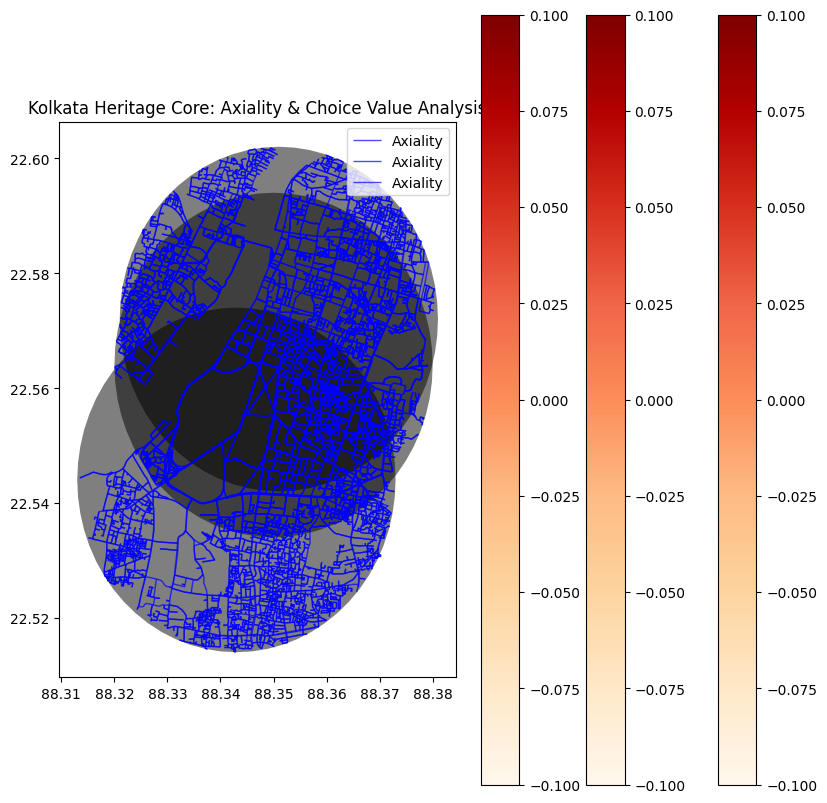

✅ Axiality & Choice Value Analysis Complete!
📍 Axiality Data: /content/Kolkata_Heritage_Axiality.xlsx
📍 Choice Value Data: /content/Kolkata_Heritage_Choice_Values.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install Dependencies
!pip install osmnx networkx geopandas folium matplotlib pandas scikit-learn mapclassify shapely

# Step 2: Import Required Libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point, Polygon
from folium.plugins import HeatMap
from mapclassify import classify

# Step 3: Define the Heritage Core (Kolkata)
print("Defining Kolkata Heritage Core for Axiality and Choice Value Analysis...")

heritage_areas = {
    "BBD Bag": Point(88.351, 22.572),
    "Esplanade": Point(88.350, 22.564),
    "Victoria Memorial": Point(88.343, 22.544)
}

heritage_buffers = {name: loc.buffer(0.03) for name, loc in heritage_areas.items()}
heritage_gdf = gpd.GeoDataFrame({"name": list(heritage_buffers.keys())},
                                geometry=list(heritage_buffers.values()), crs="EPSG:4326")

# Step 4: Extract Street Network
print("Extracting street network from OpenStreetMap...")
heritage_graphs = {name: ox.graph_from_polygon(geom, network_type="drive") for name, geom in heritage_buffers.items()}

# Step 5: Compute Axiality (Longest, Most Connected Streets)
print("Computing Axiality for Heritage Core...")

axiality_data = {}
for name, graph in heritage_graphs.items():
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(graph)

    axial_lines = []
    for u, v, data in graph.edges(data=True):
        geom = data.get("geometry", LineString([Point(graph.nodes[u]['x'], graph.nodes[u]['y']),
                                                Point(graph.nodes[v]['x'], graph.nodes[v]['y'])]))
        axial_lines.append(geom)

    axiality_gdf = gpd.GeoDataFrame(geometry=axial_lines, crs="EPSG:4326")
    axiality_gdf["length"] = axiality_gdf.length
    axiality_data[name] = axiality_gdf

# Step 6: Compute Choice Values (Optimized for Large Networks)
print("Computing Choice Values for Heritage Core...")

choice_data = {}
for name, graph in heritage_graphs.items():
    print(f"Processing {name}...")
    choice_values = nx.betweenness_centrality(graph, weight="length", k=500)

    choice_gdf = pd.DataFrame({
        "Street_Node": list(choice_values.keys()),
        "Choice_Value": list(choice_values.values())
    })

    choice_data[name] = choice_gdf

# Step 7: Generate Figure-Ground Map and Layer Axiality & Choice Values
print("Generating Figure-Ground Maps with Axiality and Choice Layers...")

fig, ax = plt.subplots(figsize=(10, 10))

heritage_gdf.plot(ax=ax, color="black", alpha=0.5, edgecolor="none", label="Built-Up Area")

for name in axiality_data.keys():
    axiality_data[name].plot(ax=ax, color="blue", linewidth=1, alpha=0.7, label="Axiality")

for name, graph in heritage_graphs.items():
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(graph)

    available_columns = list(gdf_edges.columns)
    print(f"Available Columns in gdf_edges ({name}): {available_columns}")

    node_col_1 = "u" if "u" in available_columns else available_columns[0]
    node_col_2 = "v" if "v" in available_columns else available_columns[1]

    # ✅ Fix Choice Value Mapping
    choice_df = choice_data[name].set_index("Street_Node")["Choice_Value"]
    gdf_edges[node_col_1] = gdf_edges[node_col_1].astype(str)
    choice_df.index = choice_df.index.astype(str)

    gdf_edges["choice_value"] = gdf_edges[node_col_1].astype(str).reindex(choice_df.index).map(choice_df)

    gdf_edges.plot(ax=ax, column="choice_value", cmap="OrRd", linewidth=2, legend=True, alpha=0.7)

plt.title("Kolkata Heritage Core: Axiality & Choice Value Analysis")
plt.legend()
plt.show()

# Step 8: Save Results
axiality_data_combined = pd.concat([df for df in axiality_data.values()])
choice_data_combined = pd.concat([df for df in choice_data.values()])

axiality_file = "/content/Kolkata_Heritage_Axiality.xlsx"
choice_file = "/content/Kolkata_Heritage_Choice_Values.xlsx"

axiality_data_combined.to_excel(axiality_file, index=False)
choice_data_combined.to_excel(choice_file, index=False)

print(f"✅ Axiality & Choice Value Analysis Complete!")
print(f"📍 Axiality Data: {axiality_file}")
print(f"📍 Choice Value Data: {choice_file}")

# Provide Download Links
from google.colab import files
files.download(axiality_file)
files.download(choice_file)


In [ ]:
# Step 1: Install Dependencies
!pip install osmnx networkx geopandas folium matplotlib pandas scikit-learn mapclassify shapely

# Step 2: Import Required Libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString, Point, Polygon
from folium.plugins import HeatMap
from mapclassify import classify

# Step 3: Define the Heritage Core (Kolkata)
print("Defining Kolkata Heritage Core for Axiality and Choice Value Analysis...")

heritage_areas = {
    "BBD Bag": Point(88.351, 22.572),
    "Esplanade": Point(88.350, 22.564),
    "Victoria Memorial": Point(88.343, 22.544)
}

heritage_buffers = {name: loc.buffer(0.03) for name, loc in heritage_areas.items()}
heritage_gdf = gpd.GeoDataFrame({"name": list(heritage_buffers.keys())},
                                geometry=list(heritage_buffers.values()), crs="EPSG:4326")

# Step 4: Extract Street Network
print("Extracting street network from OpenStreetMap...")
heritage_graphs = {name: ox.graph_from_polygon(geom, network_type="drive") for name, geom in heritage_buffers.items()}

# Step 5: Compute Axiality (Longest, Most Connected Streets)
print("Computing Axiality for Heritage Core...")

axiality_data = {}
for name, graph in heritage_graphs.items():
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(graph)

    axial_lines = []
    for u, v, data in graph.edges(data=True):
        geom = data.get("geometry", LineString([Point(graph.nodes[u]['x'], graph.nodes[u]['y']),
                                                Point(graph.nodes[v]['x'], graph.nodes[v]['y'])]))
        axial_lines.append(geom)

    axiality_gdf = gpd.GeoDataFrame(geometry=axial_lines, crs="EPSG:4326")
    axiality_gdf["length"] = axiality_gdf.length
    axiality_data[name] = axiality_gdf

# Step 6: Compute Choice Values (Optimized for Large Networks)
print("Computing Choice Values for Heritage Core...")

choice_data = {}
for name, graph in heritage_graphs.items():
    print(f"Processing {name}...")
    choice_values = nx.betweenness_centrality(graph, weight="length", k=500)

    choice_gdf = pd.DataFrame({
        "Street_Node": list(choice_values.keys()),
        "Choice_Value": list(choice_values.values())
    })

    choice_data[name] = choice_gdf

# Step 7: Define Color Mapping Function
def get_color(value, scale):
    bins = scale
    colors = ["green", "yellow", "orange", "red", "darkred"]
    for i, b in enumerate(bins):
        if value <= b:
            return colors[i]
    return colors[-1]

# Step 8: Normalize & Assign Colors for Axiality & Choice Values
for name in heritage_graphs.keys():
    choice_max = choice_data[name]["Choice_Value"].max()
    choice_data[name]["Choice_Color"] = choice_data[name]["Choice_Value"].apply(lambda x: get_color(x / choice_max, [0.2, 0.4, 0.6, 0.8]))

    axiality_max = axiality_data[name]["length"].max()
    axiality_data[name]["Axiality_Color"] = axiality_data[name]["length"].apply(lambda x: get_color(x / axiality_max, [0.2, 0.4, 0.6, 0.8]))

# Step 9: Generate Interactive OSM Map
print("Generating Interactive OSM Map with Axiality & Choice Values...")

m = folium.Map(location=[22.564, 88.347], zoom_start=14, tiles="cartodbpositron")

# Add Choice Values to the Map
for name, graph in heritage_graphs.items():
    for idx, row in choice_data[name].iterrows():
        folium.CircleMarker(
            location=[graph.nodes[row["Street_Node"]]["y"], graph.nodes[row["Street_Node"]]["x"]],
            radius=5,
            color=row["Choice_Color"],
            fill=True,
            fill_color=row["Choice_Color"],
            fill_opacity=0.7,
            popup=f"{name}: {row['Choice_Value']:.2f} Choice Value"
        ).add_to(m)

# Add Axiality Roads to the Map (✅ Fix Applied Here)
for name, gdf in axiality_data.items():
    for idx, row in gdf.iterrows():
        if isinstance(row.geometry, LineString):
            locations = [(y, x) for x, y in zip(*row.geometry.xy)]
        elif isinstance(row.geometry, Polygon):
            locations = [(y, x) for x, y in zip(*row.geometry.exterior.xy)]
        elif isinstance(row.geometry, MultiLineString):
            locations = [(y, x) for line in row.geometry for x, y in zip(*line.xy)]
        else:
            locations = []

        folium.PolyLine(
            locations=locations,
            color=row["Axiality_Color"],
            weight=2,
            opacity=0.7,
            popup=f"{name}: {row['length']:.2f} Axiality Value"
        ).add_to(m)

# Step 10: Add a Legend
legend_html = """
<div style="position: fixed;
            bottom: 30px; right: 30px; width: 250px; height: 150px;
            background-color: white; z-index:9999; font-size:14px;
            border-radius: 10px; padding: 10px; box-shadow: 3px 3px 10px rgba(0,0,0,0.5);
            ">
<h4>Axiality & Choice Value Ranges</h4>
<i style="background: green; width: 10px; height: 10px; display: inline-block;"></i> Very Low (0-20%)<br>
<i style="background: yellow; width: 10px; height: 10px; display: inline-block;"></i> Low (20-40%)<br>
<i style="background: orange; width: 10px; height: 10px; display: inline-block;"></i> Moderate (40-60%)<br>
<i style="background: red; width: 10px; height: 10px; display: inline-block;"></i> High (60-80%)<br>
<i style="background: darkred; width: 10px; height: 10px; display: inline-block;"></i> Critical (>80%)<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Save Interactive OSM Map
map_file = "/content/kolkata_heritage_axiality_choice.html"
m.save(map_file)

from google.colab import files
files.download(map_file)


Defining Kolkata Heritage Core for Axiality and Choice Value Analysis...
Extracting street network from OpenStreetMap...
Computing Axiality for Heritage Core...


<ipython-input-6-b1f5b205c999>:47: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  axiality_gdf["length"] = axiality_gdf.length
<ipython-input-6-b1f5b205c999>:47: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  axiality_gdf["length"] = axiality_gdf.length
<ipython-input-6-b1f5b205c999>:47: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  axiality_gdf["length"] = axiality_gdf.length


Computing Choice Values for Heritage Core...
Processing BBD Bag...
Processing Esplanade...
Processing Victoria Memorial...
Generating Interactive OSM Map with Axiality & Choice Values...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Extracting walkable street network for Kolkata Heritage Core...
Extracting pedestrian-friendly street network...
Generating KDE Walkability Map...


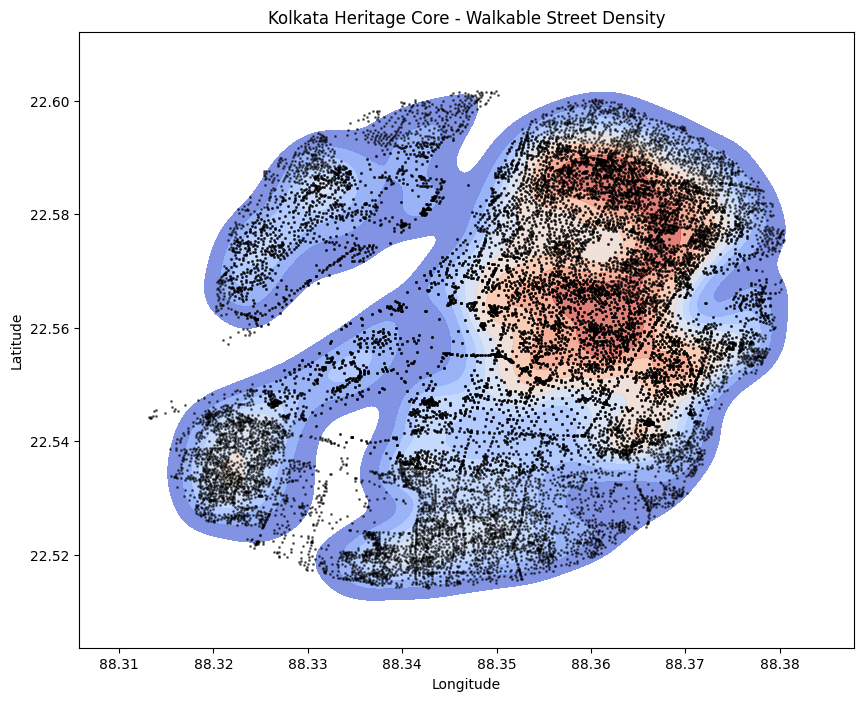

✅ Walkability KDE Map Saved: /content/Kolkata_Walkability_KDE.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Step 1: Install Dependencies
!pip install osmnx networkx geopandas folium matplotlib seaborn pandas shapely

# Step 2: Import Required Libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Step 3: Define the Heritage Core of Kolkata
print("Extracting walkable street network for Kolkata Heritage Core...")

heritage_areas = {
    "BBD Bag": Point(88.351, 22.572),
    "Esplanade": Point(88.350, 22.564),
    "Victoria Memorial": Point(88.343, 22.544)
}

heritage_buffers = {name: loc.buffer(0.03) for name, loc in heritage_areas.items()}
heritage_gdf = gpd.GeoDataFrame({"name": list(heritage_buffers.keys())},
                                geometry=list(heritage_buffers.values()), crs="EPSG:4326")

# Step 4: Extract the Walkable Street Network from OSM
print("Extracting pedestrian-friendly street network...")
heritage_graphs = {name: ox.graph_from_polygon(geom, network_type="walk") for name, geom in heritage_buffers.items()}

# Step 5: Convert to GeoDataFrame for Walkability Analysis
walkable_edges = []
for name, graph in heritage_graphs.items():
    gdf_edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
    gdf_edges["heritage_area"] = name  # Tag each segment with its area
    walkable_edges.append(gdf_edges)

# Merge all edges into one DataFrame
walkable_edges_gdf = pd.concat(walkable_edges, ignore_index=True)

# Step 6: Extract Street Midpoints for KDE Analysis
walkable_edges_gdf["midpoint"] = walkable_edges_gdf.geometry.apply(lambda line: line.interpolate(0.5, normalized=True))
midpoint_df = pd.DataFrame({"x": walkable_edges_gdf["midpoint"].x, "y": walkable_edges_gdf["midpoint"].y})

# Step 7: Plot KDE (Kernel Density Estimation) of Walkable Streets
print("Generating KDE Walkability Map...")

plt.figure(figsize=(10, 8))
sns.kdeplot(data=midpoint_df, x="x", y="y", fill=True, cmap="coolwarm", alpha=0.7)
plt.scatter(midpoint_df["x"], midpoint_df["y"], s=1, color="black", alpha=0.3)  # Overlay street midpoints
plt.title("Kolkata Heritage Core - Walkable Street Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Step 8: Save the KDE Map
kde_map_file = "/content/Kolkata_Walkability_KDE.png"
plt.savefig(kde_map_file, dpi=300)
print(f"✅ Walkability KDE Map Saved: {kde_map_file}")

# Step 9: Provide Download Link
from google.colab import files
files.download(kde_map_file)


Extracting walkable street network for Kolkata Heritage Core with 5km buffer...
Extracting pedestrian-friendly street network...
Extracting full street network for overlaying...


<ipython-input-8-1cccc7d3e499>:43: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  full_street_graph = ox.graph_from_polygon(gpd.GeoSeries(heritage_buffers.values()).unary_union, network_type="all")


Generating KDE Walkability Map over Street Network...


<ipython-input-8-1cccc7d3e499>:68: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


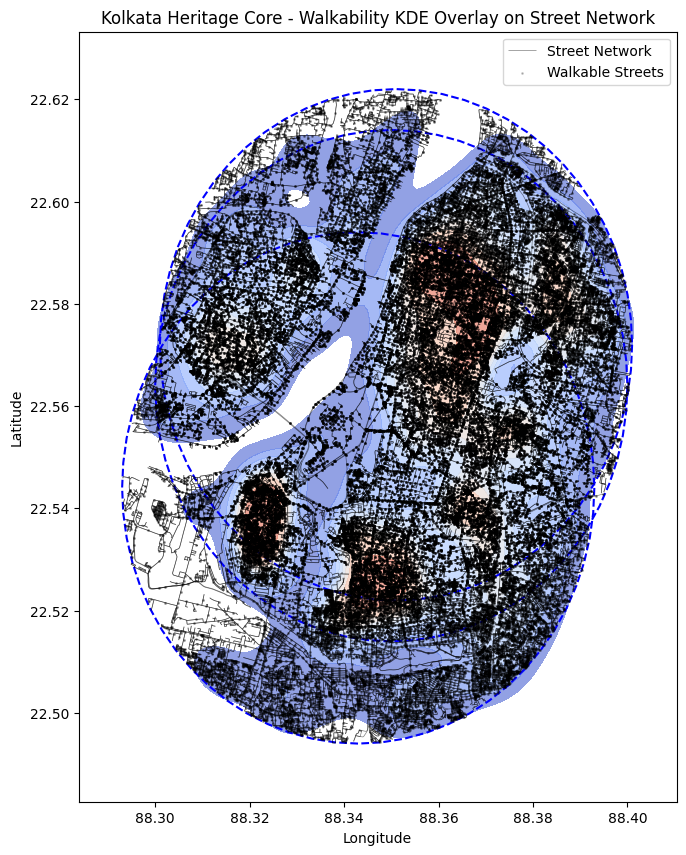

✅ Walkability KDE Overlay Map Saved: /content/Kolkata_Walkability_KDE_Overlay.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Step 1: Install Dependencies
!pip install osmnx networkx geopandas folium matplotlib seaborn pandas shapely

# Step 2: Import Required Libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

# Step 3: Define the Heritage Core of Kolkata with a 5 km Buffer
print("Extracting walkable street network for Kolkata Heritage Core with 5km buffer...")

heritage_areas = {
    "BBD Bag": Point(88.351, 22.572),
    "Esplanade": Point(88.350, 22.564),
    "Victoria Memorial": Point(88.343, 22.544)
}

# Define buffer zones (5 km)
heritage_buffers = {name: loc.buffer(0.05) for name, loc in heritage_areas.items()}
heritage_gdf = gpd.GeoDataFrame({"name": list(heritage_buffers.keys())},
                                geometry=list(heritage_buffers.values()), crs="EPSG:4326")

# Step 4: Extract the Walkable Street Network from OSM
print("Extracting pedestrian-friendly street network...")
heritage_graphs = {name: ox.graph_from_polygon(geom, network_type="walk") for name, geom in heritage_buffers.items()}

# Step 5: Convert to GeoDataFrame for Walkability Analysis
walkable_edges = []
for name, graph in heritage_graphs.items():
    gdf_edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
    gdf_edges["heritage_area"] = name  # Tag each segment with its area
    walkable_edges.append(gdf_edges)

# Merge all edges into one DataFrame
walkable_edges_gdf = pd.concat(walkable_edges, ignore_index=True)

# Step 6: Extract the Full Street Network for Overlay
print("Extracting full street network for overlaying...")
full_street_graph = ox.graph_from_polygon(gpd.GeoSeries(heritage_buffers.values()).unary_union, network_type="all")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(full_street_graph)

# Step 7: Extract Street Midpoints for KDE Analysis
walkable_edges_gdf["midpoint"] = walkable_edges_gdf.geometry.apply(lambda line: line.interpolate(0.5, normalized=True))
midpoint_df = pd.DataFrame({"x": walkable_edges_gdf["midpoint"].x, "y": walkable_edges_gdf["midpoint"].y})

# Step 8: Plot KDE (Kernel Density Estimation) of Walkable Streets Overlaid on Street Network
print("Generating KDE Walkability Map over Street Network...")

plt.figure(figsize=(12, 10))

# Plot the street network
gdf_edges.plot(ax=plt.gca(), color="black", linewidth=0.5, alpha=0.5, label="Street Network")

# KDE Density Plot Overlay
sns.kdeplot(data=midpoint_df, x="x", y="y", fill=True, cmap="coolwarm", alpha=0.6)

# Plot Heritage Core Buffer
heritage_gdf.plot(ax=plt.gca(), color="none", edgecolor="blue", linewidth=1.5, linestyle="dashed", label="Heritage Core (5 km Buffer)")

plt.scatter(midpoint_df["x"], midpoint_df["y"], s=1, color="black", alpha=0.2, label="Walkable Streets")
plt.title("Kolkata Heritage Core - Walkability KDE Overlay on Street Network")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

# Step 9: Save the KDE Overlay Map
kde_map_file = "/content/Kolkata_Walkability_KDE_Overlay.png"
plt.savefig(kde_map_file, dpi=300)
print(f"✅ Walkability KDE Overlay Map Saved: {kde_map_file}")

# Step 10: Provide Download Link
from google.colab import files
files.download(kde_map_file)
